# Actividad 4: Comprensión de los datos
## Tc2037 Implementation of Computational Methods

August 16, 2023.

_Authors of this notebook:_

- A01745336 Diego Alejandro Balderas Tlahuitzo
- A01753176 Gilberto André García Gaytán
- A01745312 Paula Sophia Santoyo Arteaga
- A01379299 Ricardo Ramírez Condado
- A01655569 Jared Alberto Flores Espinosa

**Instructions:**

Por equipo realizar un notebook para contestar las siguientes preguntas:

Tomar las variables numéricas y realiza una exploración de datos que resuelva las siguientes preguntas:

1. ¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

2. ¿En qué variables identifica un tipo de sesgo? Usar histogramas

3. ¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

4. ¿Qué medida de tendencia central describe mejor a la variable y por qué? (media o mediana) 

5. ¿Qué medida de variabilidad describe mejor a cada variable numérica y por qué?

In [1]:
# Import library
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load dataset
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Obtain datatypes
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
df.shape

(1460, 81)

In [9]:
# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        classification = "numeric"
    else:
        classification = "categorical"

    # Convert numpy types to native Python types for JSON serialization
    example_value = df[column].iloc[0]
    if isinstance(example_value, (np.int64, np.float64, np.int32)):
        example_value = int(example_value)

    data_analysis[column] = {
        "data_type": str(data_type),
        "unique_values": int(df[column].nunique()),
        "missing_values": int(df[column].isnull().sum()),
        "example_value": example_value,
        "classification": classification
    }

# Convert analysis to JSON format
data_analysis_json = json.dumps(data_analysis, indent=4)

# Display column names
print("Column Names:")
print(df.columns.tolist())

# Provide a data example for each column in JSON format
data_example = df.iloc[0].astype(str).to_dict()  # Convert all values to string for JSON serialization
data_example_json = json.dumps(data_example, indent=4)

print("\nData Example in JSON Format:")
print(data_example_json)


Column Names:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolA

In [11]:
# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        classification = "numeric"
    else:
        classification = "categorical"

    # Convert numpy types to native Python types
    example_value = df[column].iloc[0]
    if isinstance(example_value, (np.int64, np.float64, np.int32)):
        example_value = int(example_value)

    data_analysis[column] = {
        "data_type": str(data_type),
        "unique_values": int(df[column].nunique()),
        "missing_values": int(df[column].isnull().sum()),
        "example_value": example_value,
        "classification": classification
    }

# Provide a data example for each column
data_example = df.iloc[0].astype(str).to_dict()

# Create a dictionary with the analysis and data example
analysis_dict = {
    "data_analysis": data_analysis,
    "data_example": data_example
}

analysis_dict

{'data_analysis': {'Id': {'data_type': 'int64',
   'unique_values': 1460,
   'missing_values': 0,
   'example_value': 1,
   'classification': 'numeric'},
  'MSSubClass': {'data_type': 'int64',
   'unique_values': 15,
   'missing_values': 0,
   'example_value': 60,
   'classification': 'numeric'},
  'MSZoning': {'data_type': 'object',
   'unique_values': 5,
   'missing_values': 0,
   'example_value': 'RL',
   'classification': 'categorical'},
  'LotFrontage': {'data_type': 'float64',
   'unique_values': 110,
   'missing_values': 259,
   'example_value': 65,
   'classification': 'numeric'},
  'LotArea': {'data_type': 'int64',
   'unique_values': 1073,
   'missing_values': 0,
   'example_value': 8450,
   'classification': 'numeric'},
  'Street': {'data_type': 'object',
   'unique_values': 2,
   'missing_values': 0,
   'example_value': 'Pave',
   'classification': 'categorical'},
  'Alley': {'data_type': 'object',
   'unique_values': 2,
   'missing_values': 1369,
   'example_value': nan,
 

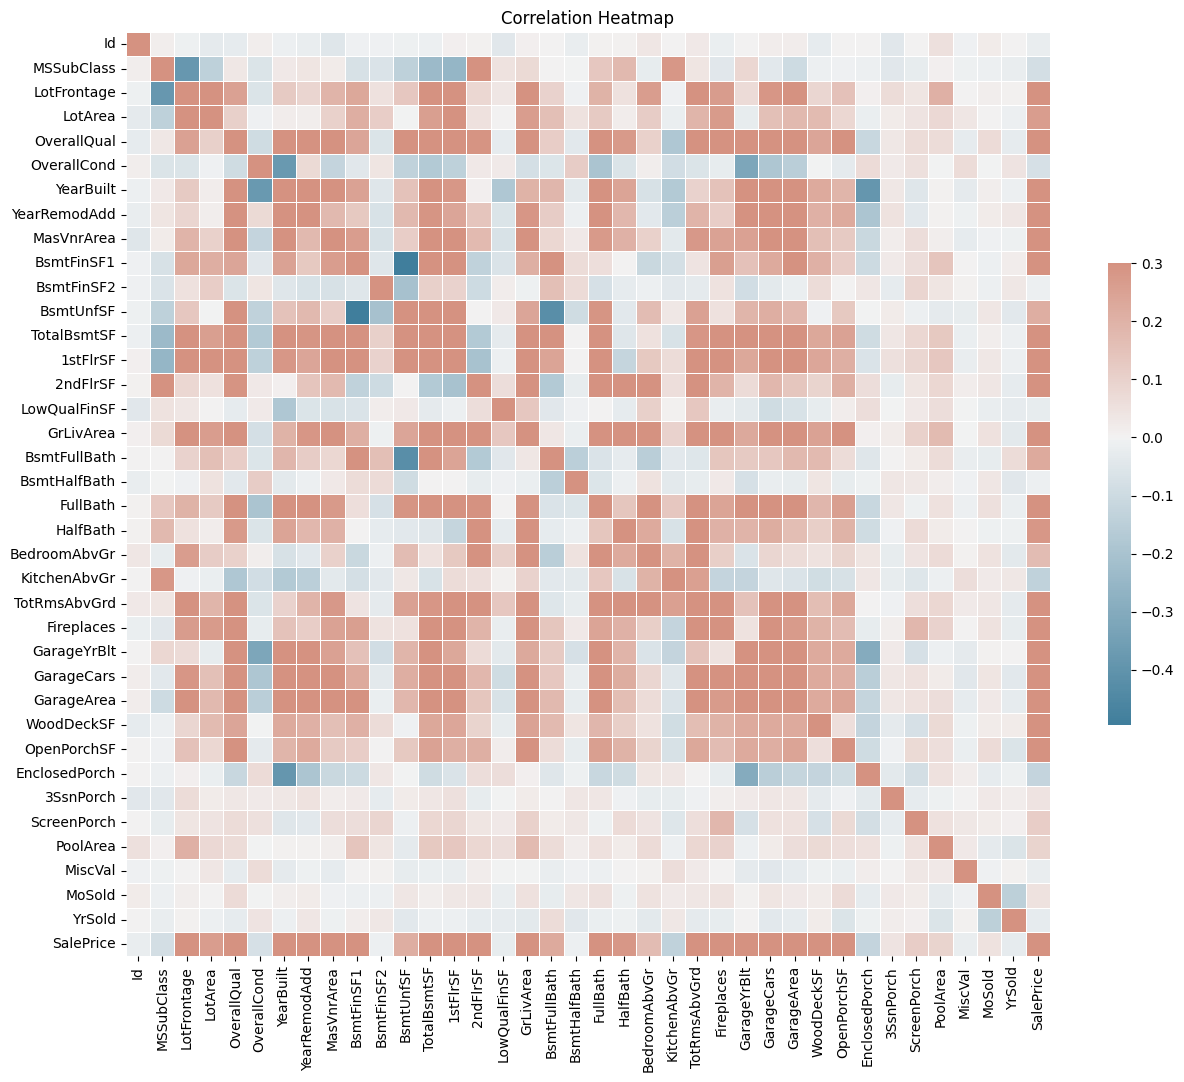

In [10]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap")
plt.show()

### 1. ¿Qué variables presentan datos atípicos? Para este punto utilizar Bloxplots

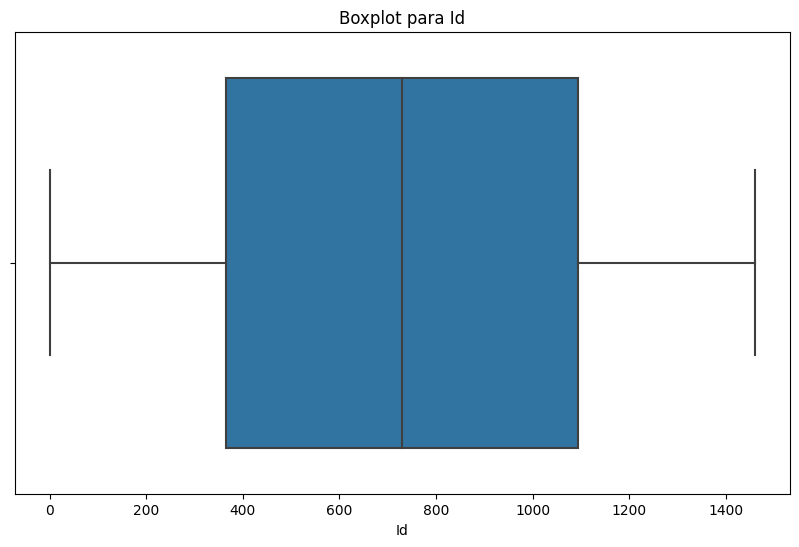

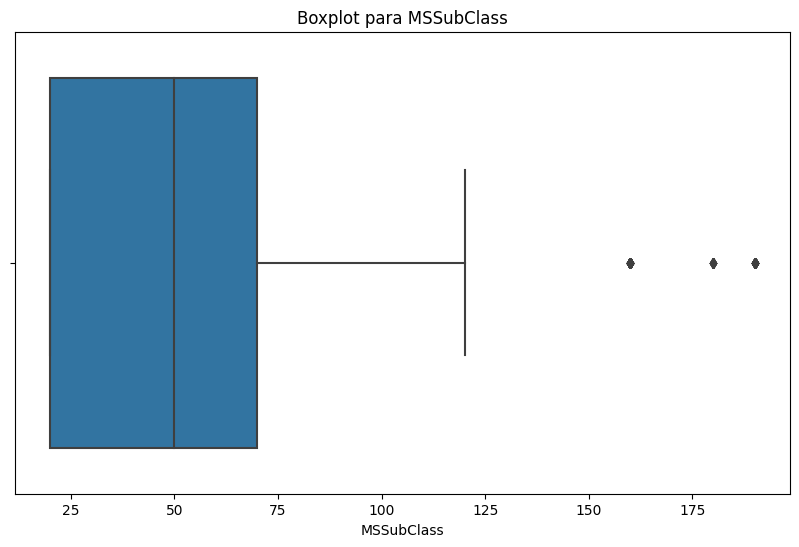

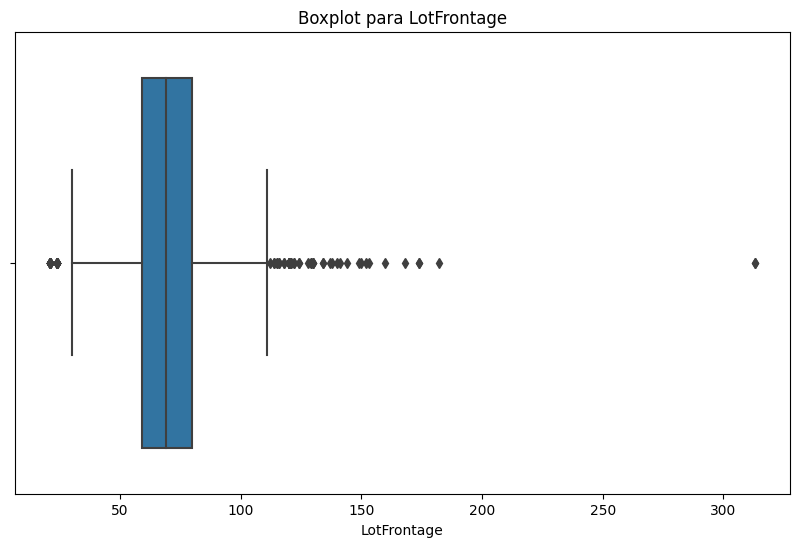

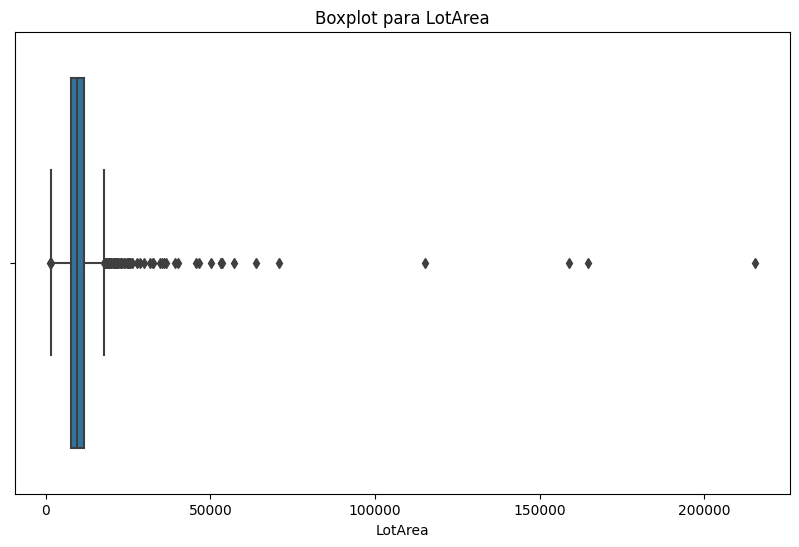

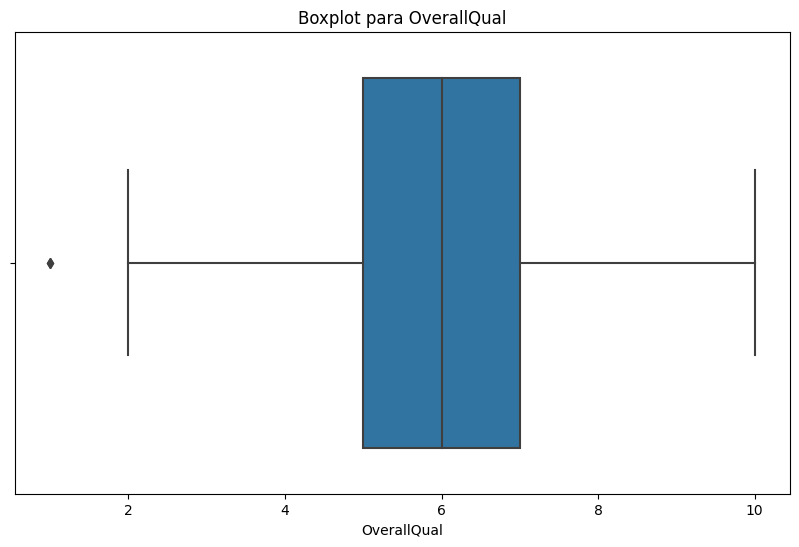

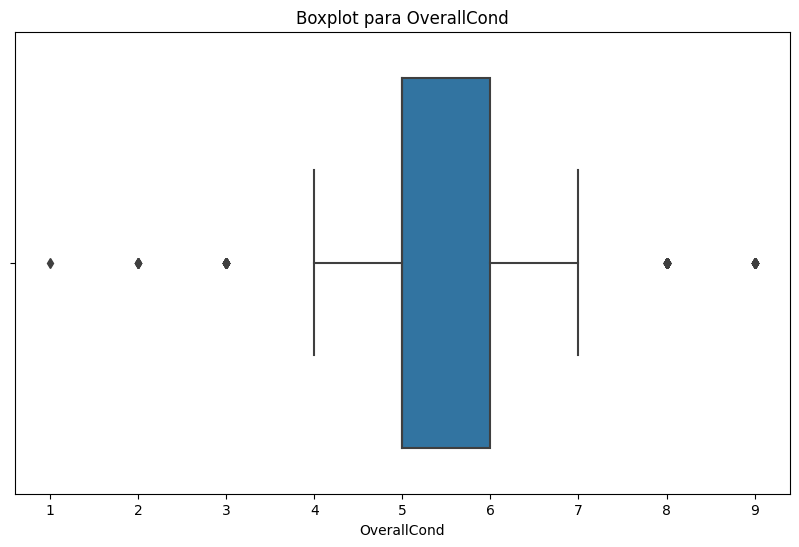

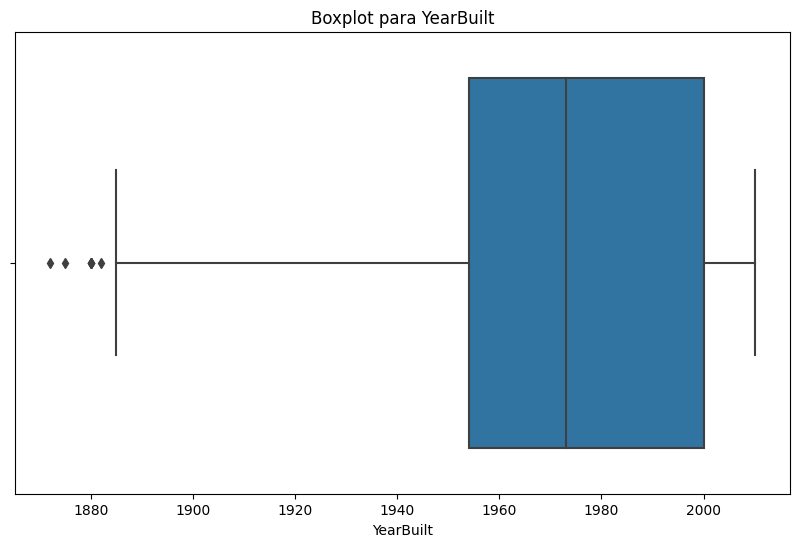

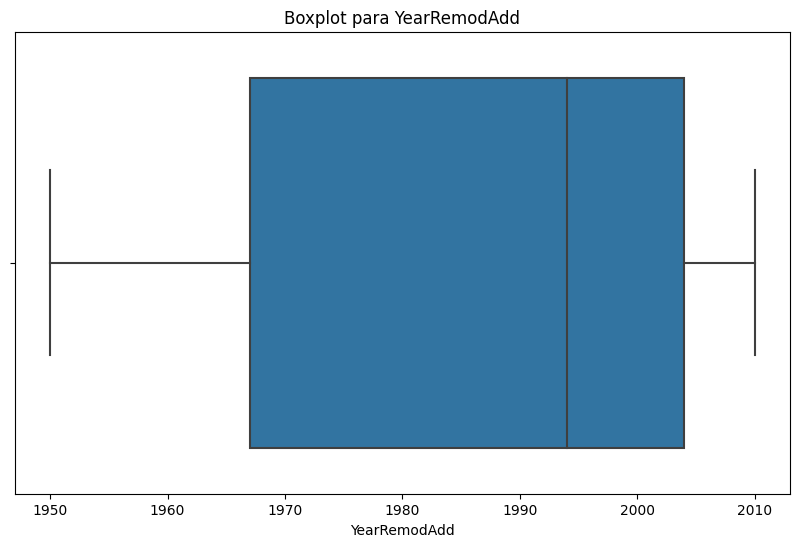

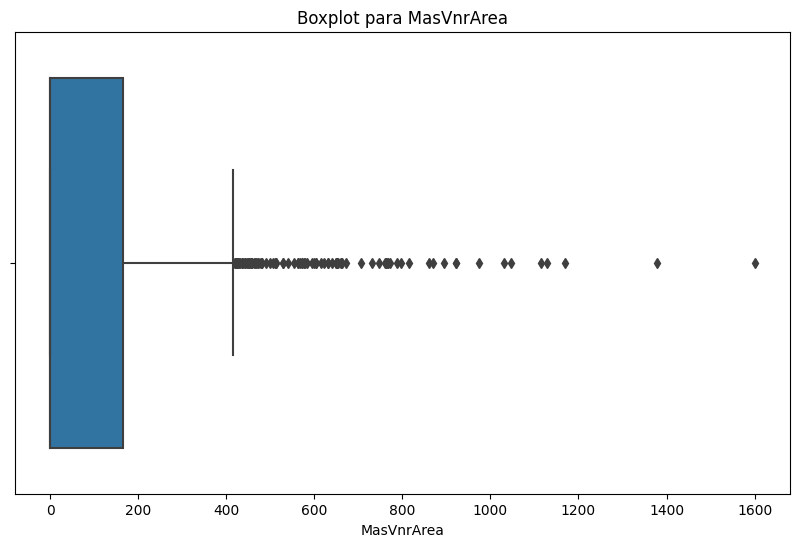

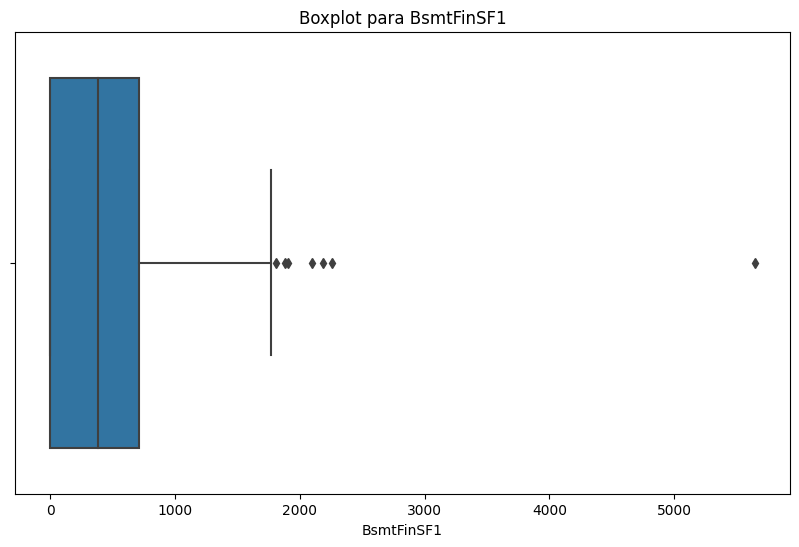

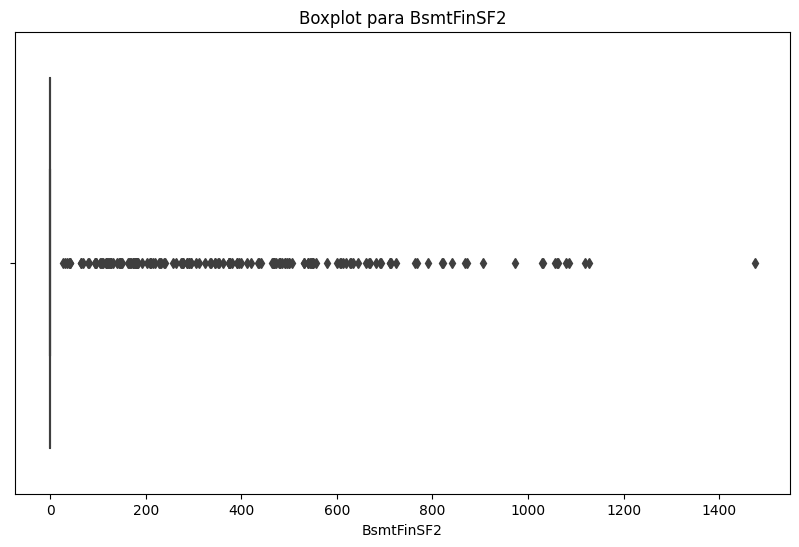

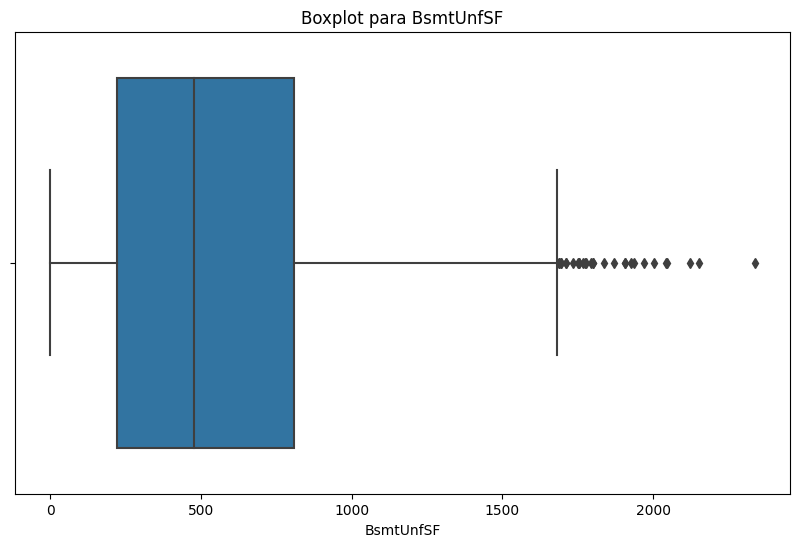

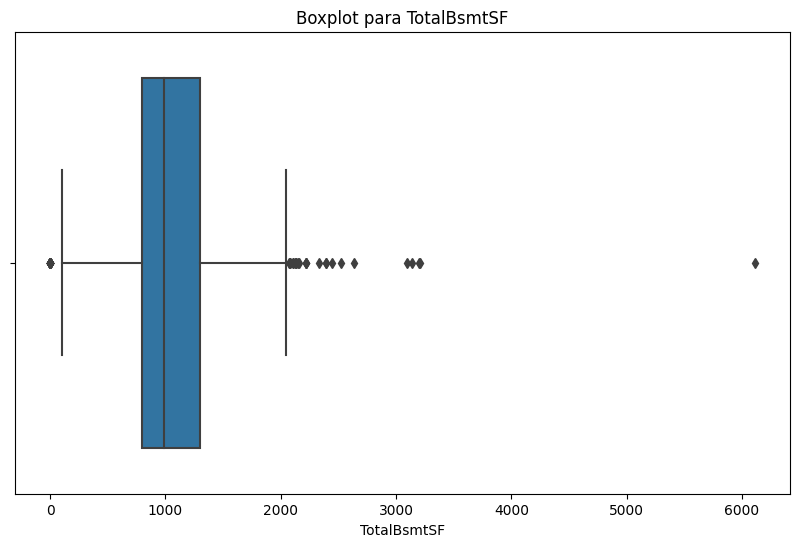

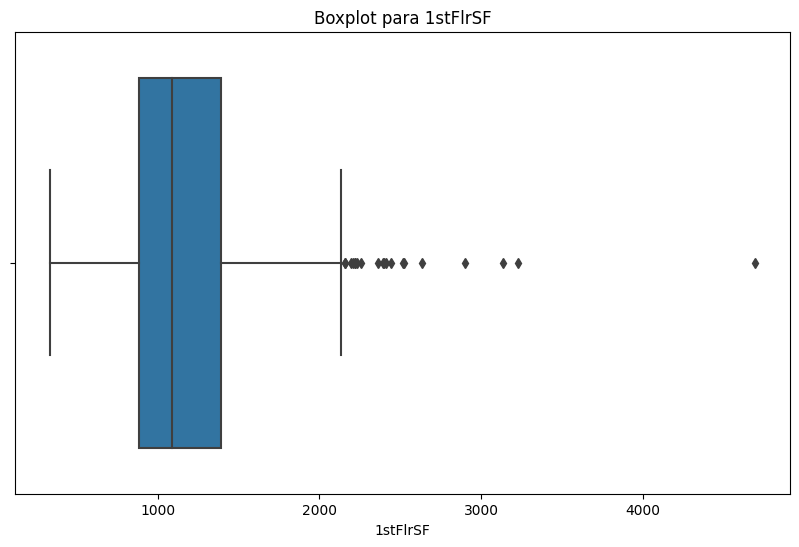

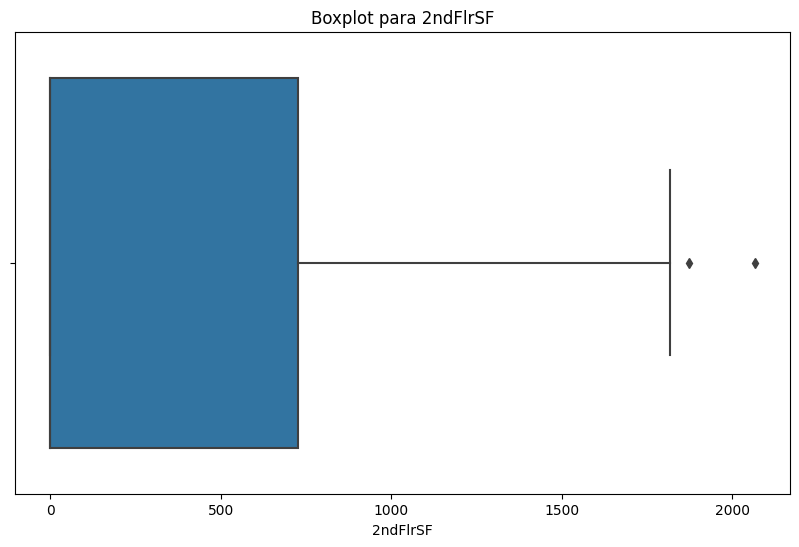

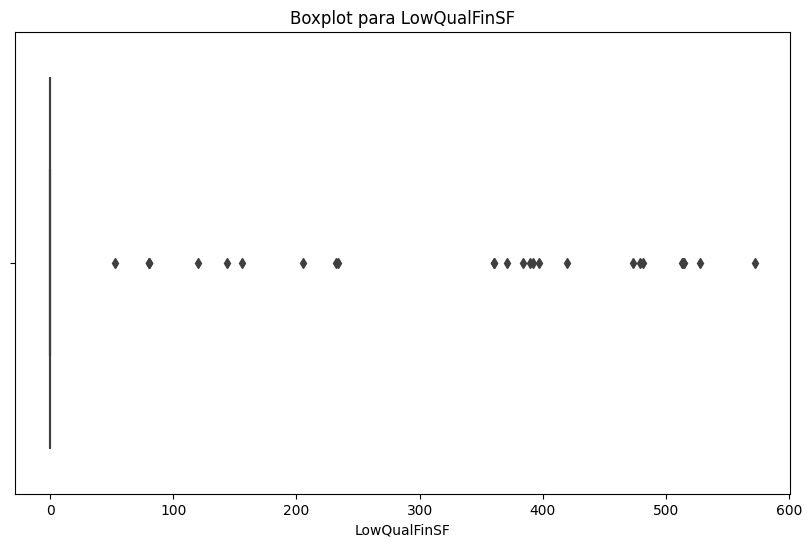

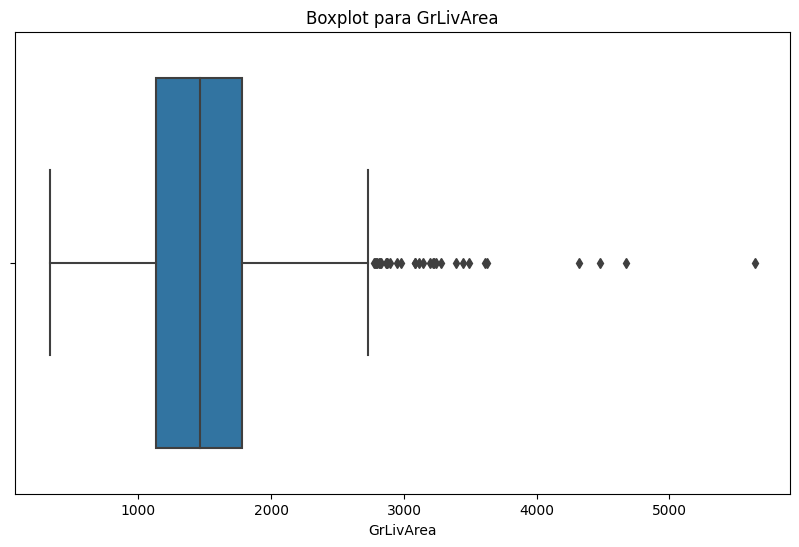

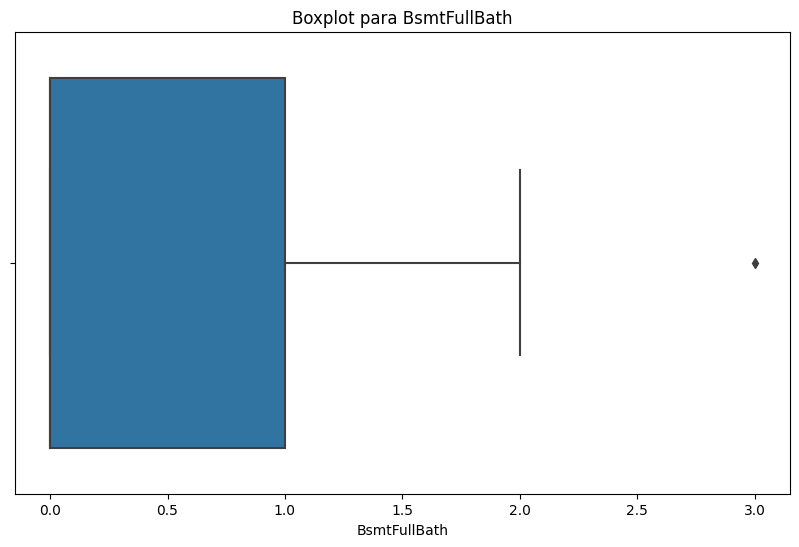

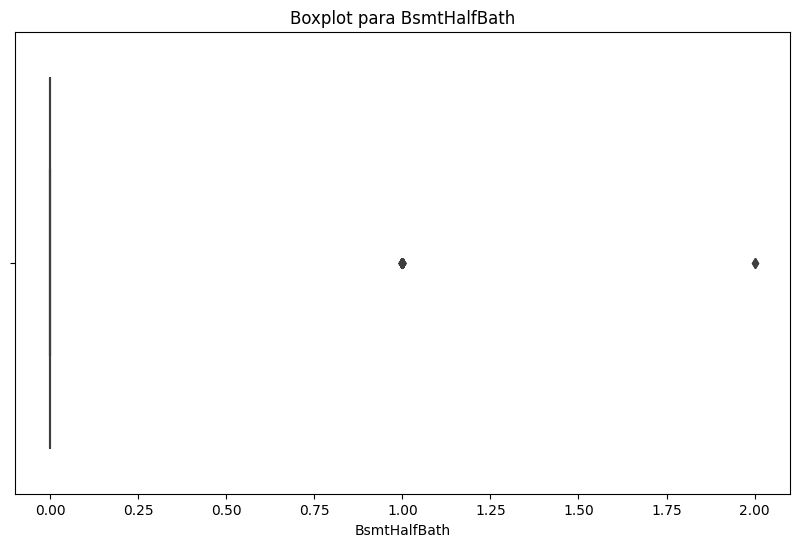

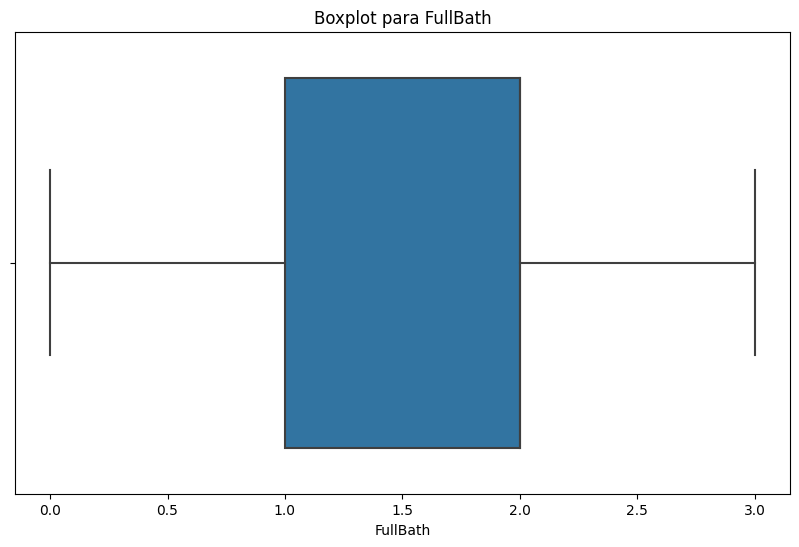

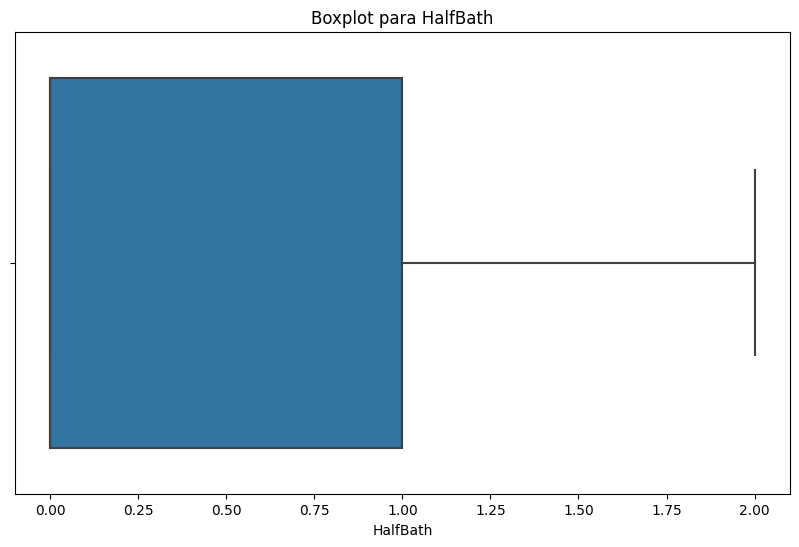

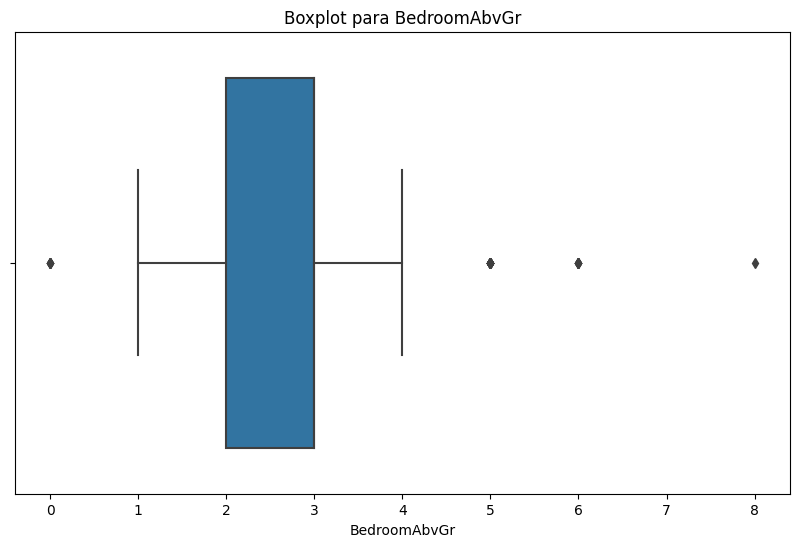

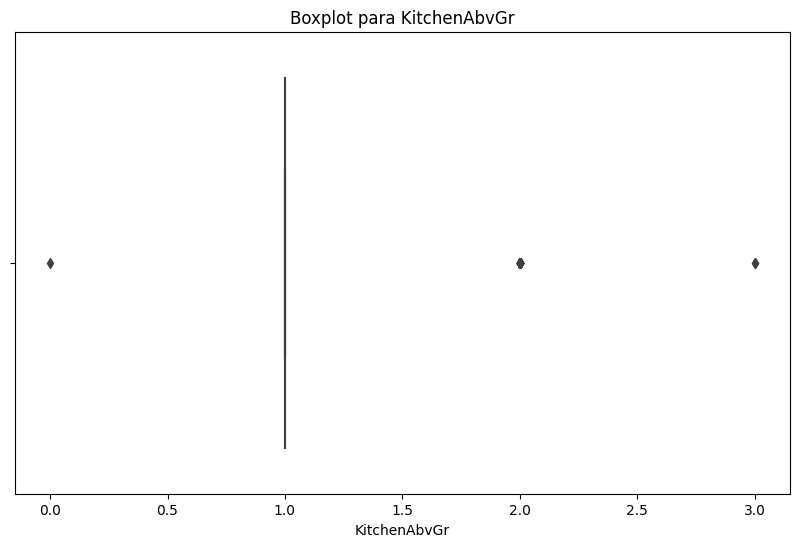

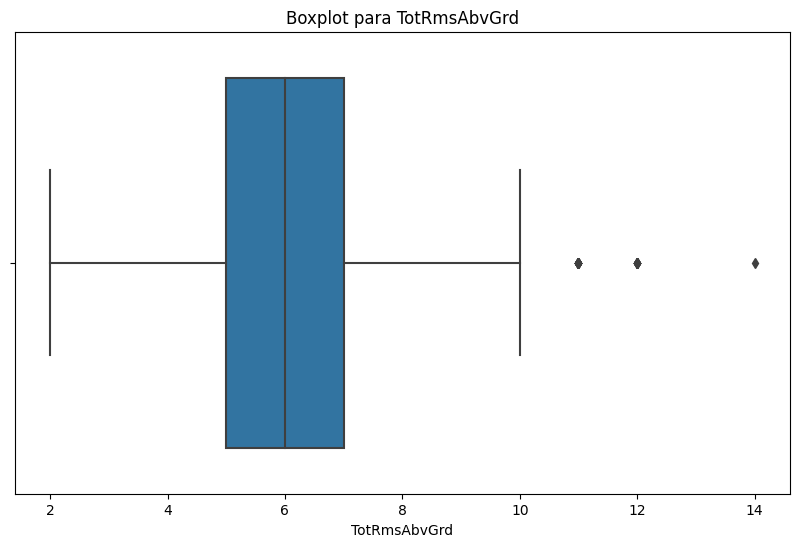

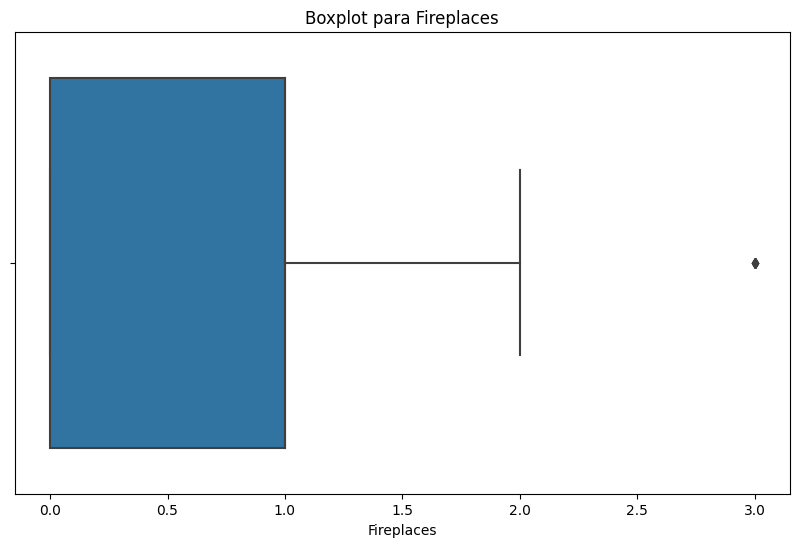

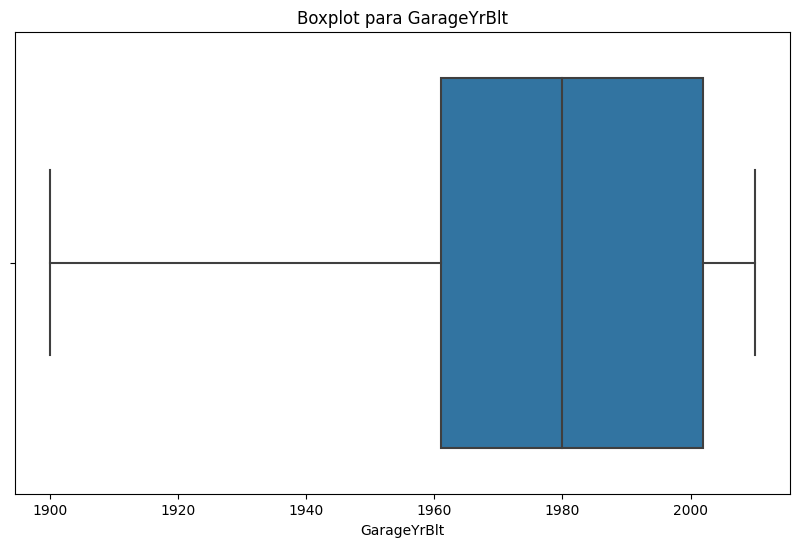

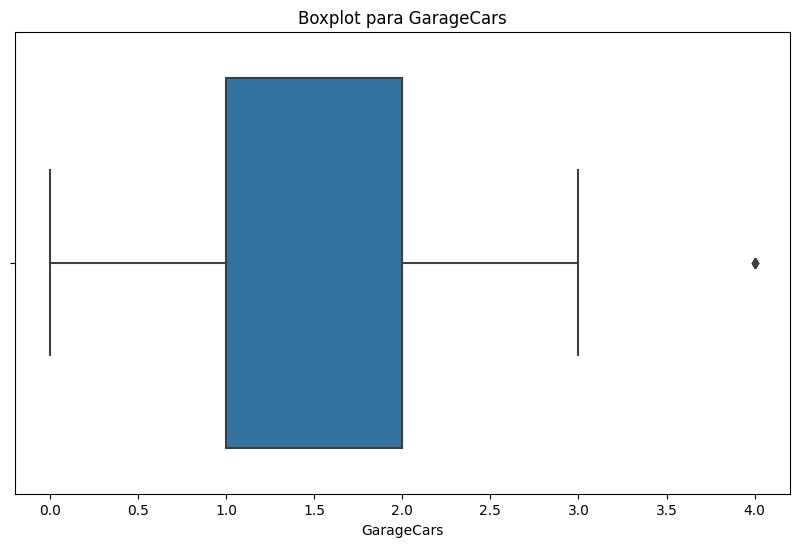

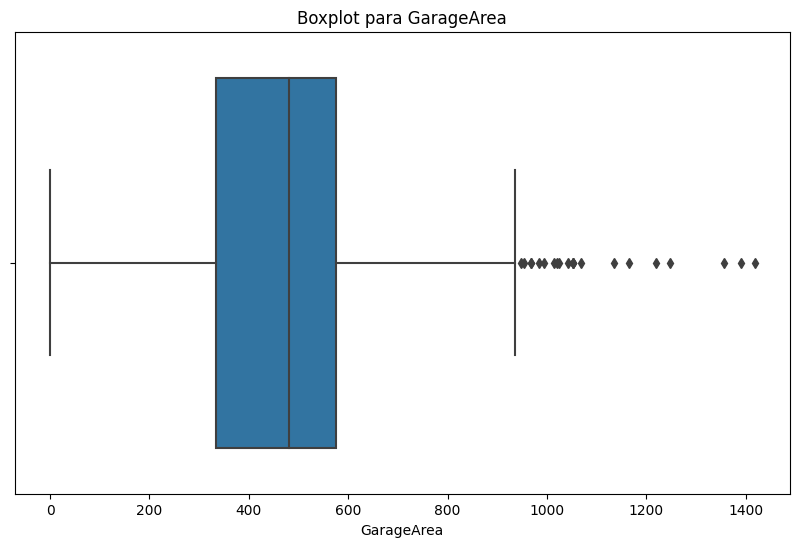

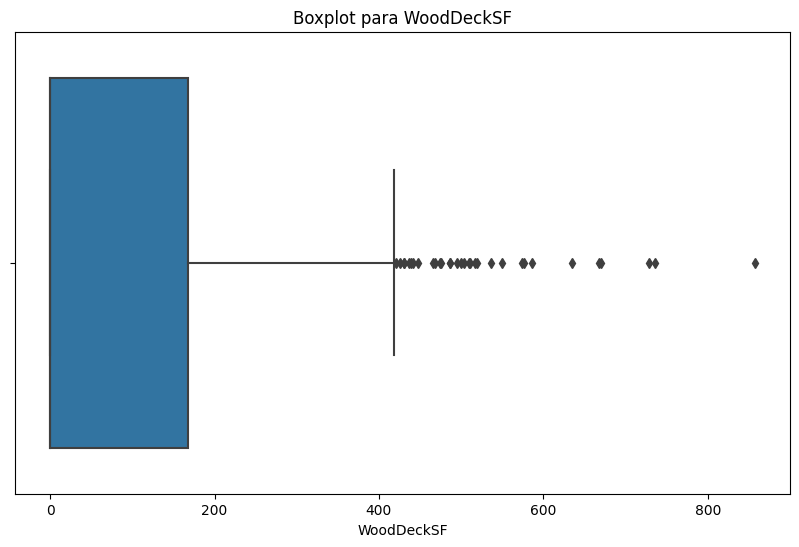

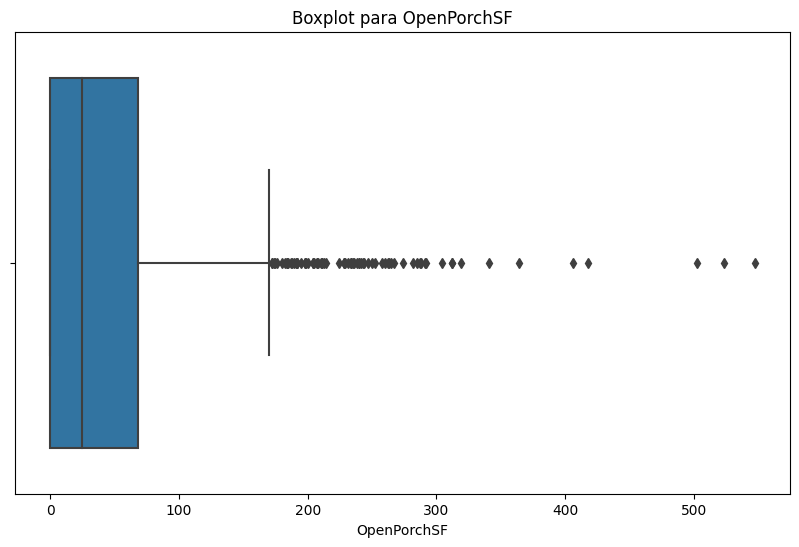

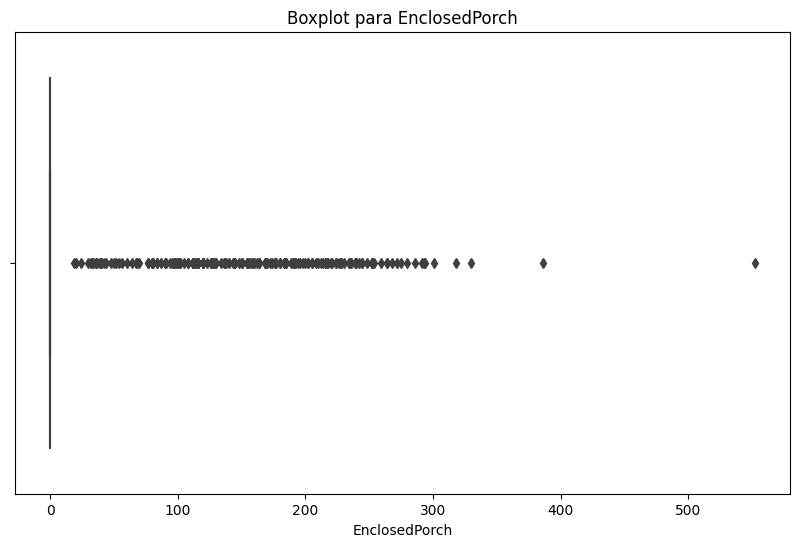

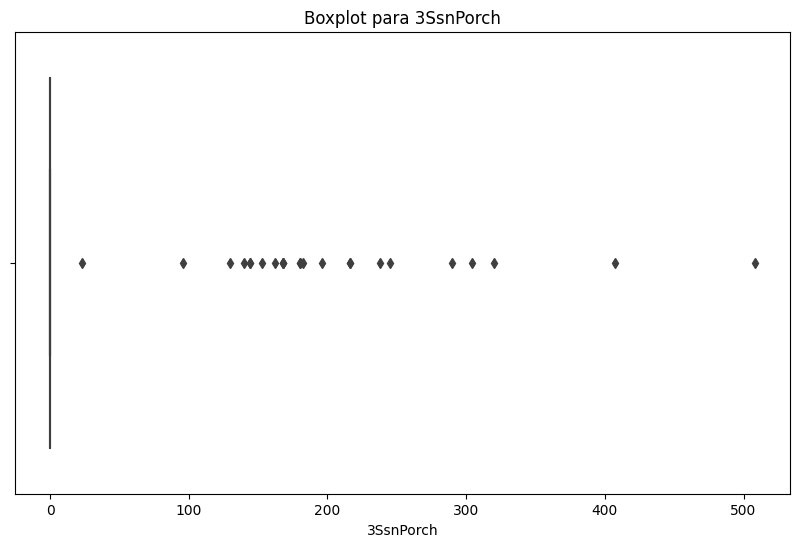

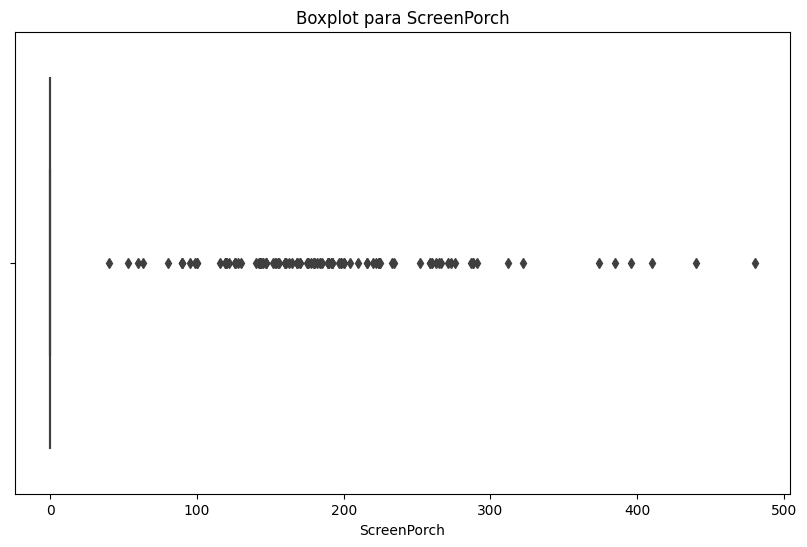

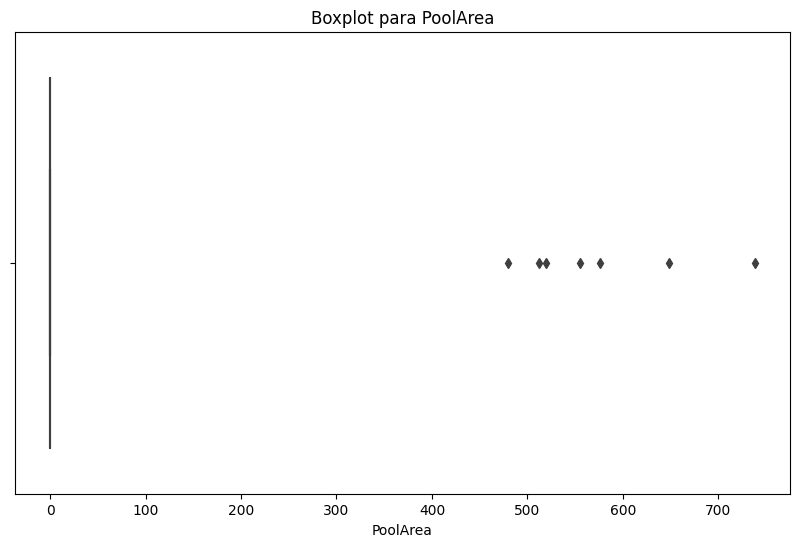

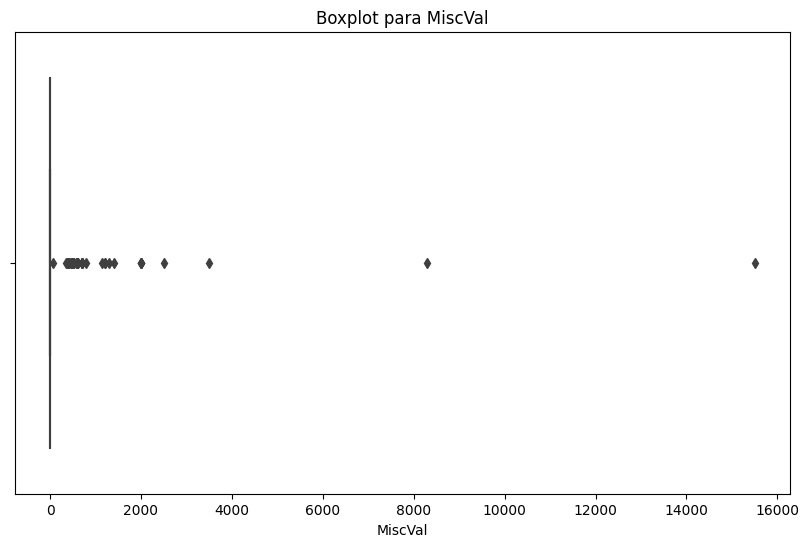

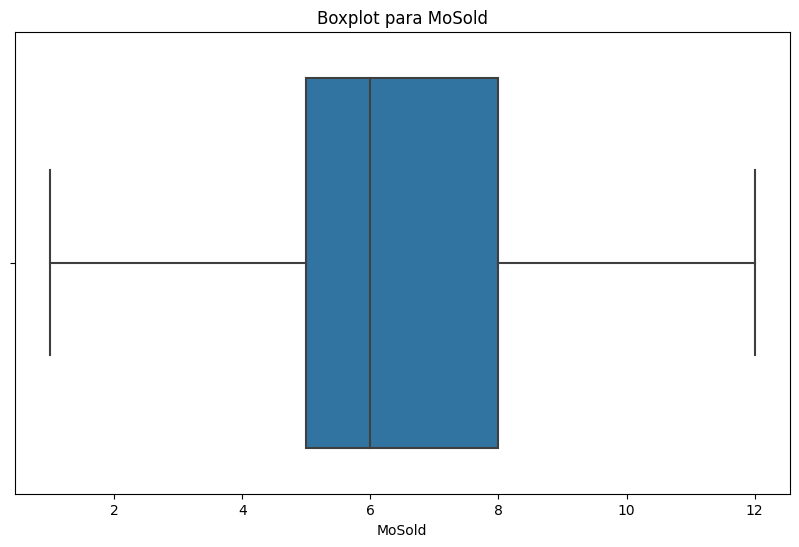

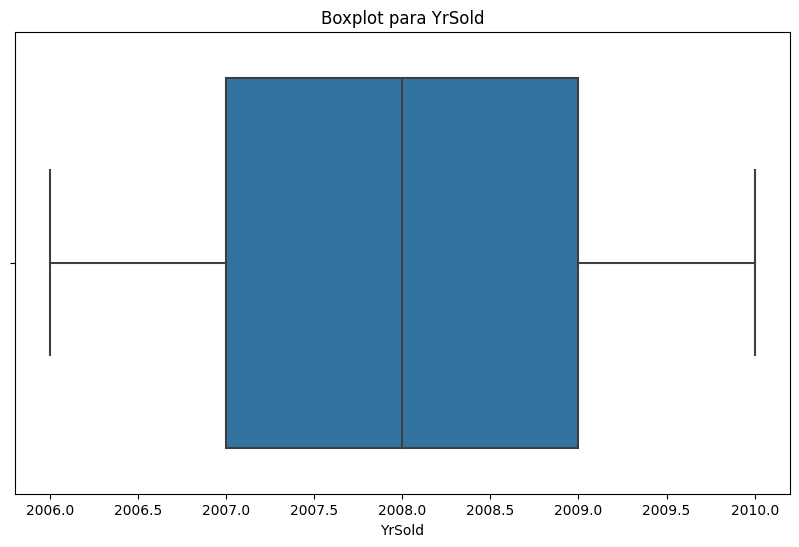

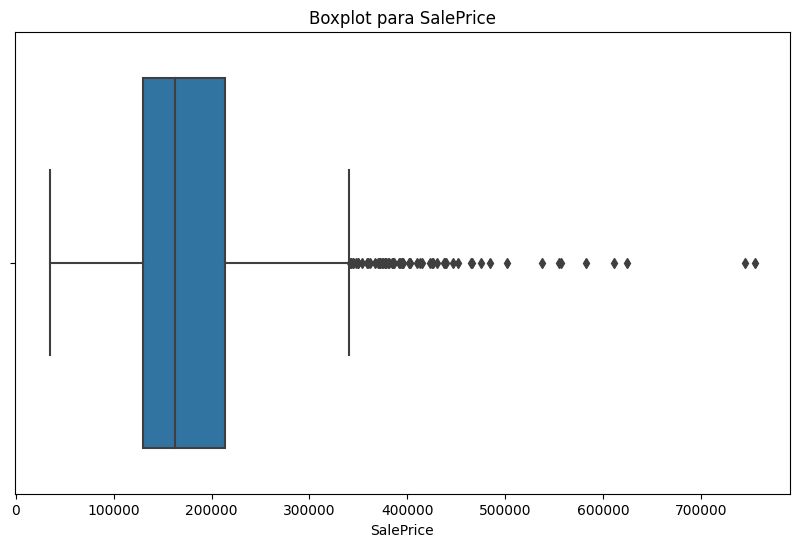

In [24]:
# For each numeric column in the DataFrame, draw a boxplot to detect outliers
numeric_cols = df.select_dtypes(include=[float, int]).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot para {col}')
    plt.show()

In [19]:
# Function to calculate outliers using IQR method
def calculate_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outliers_mask = (series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))
    return outliers_mask.sum()

# Calculate outliers for each numeric column
outliers_data = {col: calculate_outliers(df[col]) for col in numeric_cols}

# Convert the dictionary to a DataFrame for better visualization
outliers_df = pd.DataFrame(list(outliers_data.items()), columns=['Column', 'Number of Outliers'])

# Sort the DataFrame by number of outliers in descending order
outliers_df = outliers_df.sort_values(by='Number of Outliers', ascending=False)

outliers_df

,Column,Number of Outliers
30,EnclosedPorch,208
10,BsmtFinSF2,167
5,OverallCond,125
32,ScreenPorch,116
1,MSSubClass,103
8,MasVnrArea,96
2,LotFrontage,88
18,BsmtHalfBath,82
29,OpenPorchSF,77
3,LotArea,69


### 2. ¿En qué variables identifica un tipo de sesgo? Usar histogramas

In [14]:
# List to store the plots
histograms = []
biased_columns = []

for col in numeric_cols:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histograma para {col}')
    plt.close(fig)
    
    # Check for skewness
    skewness = df[col].skew()
    if abs(skewness) > 0.5:  # Using 0.5 as a threshold for significant skewness
        biased_columns.append((col, skewness))
        histograms.append(fig)

# Display the first few histograms of columns with noticeable bias
histograms[:5]

[<Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>]

In [15]:
# Convert the list of biased columns to a DataFrame for better visualization
biased_df = pd.DataFrame(biased_columns, columns=['Column', 'Skewness'])

# Add a column to indicate the type of skewness
biased_df['Type of Skewness'] = biased_df['Skewness'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

biased_df

,Column,Skewness,Type of Skewness
0,MSSubClass,1.407657,Positive
1,LotFrontage,2.163569,Positive
2,LotArea,12.207688,Positive
3,OverallCond,0.693067,Positive
4,YearBuilt,-0.613461,Negative
5,YearRemodAdd,-0.503562,Negative
6,MasVnrArea,2.669084,Positive
7,BsmtFinSF1,1.685503,Positive
8,BsmtFinSF2,4.255261,Positive
9,BsmtUnfSF,0.920268,Positive


In [20]:
# Function to calculate skewness
def calculate_skewness(series):
    return series.skew()

# Calculate skewness for each numeric column
skewness_data = {col: calculate_skewness(df[col]) for col in numeric_cols}

# Convert the dictionary to a DataFrame
skewness_df = pd.DataFrame(list(skewness_data.items()), columns=['Column', 'Skewness'])

# Add a column to indicate the type of skewness
skewness_df['Type of Skewness'] = skewness_df['Skewness'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Filter and sort the DataFrame by significant skewness (e.g., abs(skewness) > 0.5)
skewness_df = skewness_df[skewness_df['Skewness'].abs() > 0.5].sort_values(by='Skewness', ascending=False)

In [ ]:
# Loop through numeric columns and plot histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

### 3. ¿Sigue una distribución normal cada variable numérica? Usar prueba de Anderson Darling

In [22]:
from numpy.lib.shape_base import column_stack
import numpy as np
from scipy import stats

# Analyze the columns of the DataFrame
data_analysis = {}
for column in df.columns:
    data_type = df[column].dtype
    if data_type in ["int64", "float64"]:
        print(column)
        data = df[column].dropna()
        result = stats.anderson(data, dist='norm')

        # Interpretación de los resultados
        print('Estadística de prueba:', result.statistic)
        print('Valores críticos:', result.critical_values)
        print('Niveles de significancia:', result.significance_level)

        # Comprueba si la estadística de prueba es menor que el valor crítico para un cierto nivel de significancia
        alpha = 0.05
        if result.statistic < result.critical_values[2]:
            print('La muestra parece provenir de una distribución normal (p < 0.05)')
        else:
            print('La muestra no parece provenir de una distribución normal (p >= 0.05)\n')
    else:
        pass

Id
Estadística de prueba: 16.19970424203666
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
La muestra no parece provenir de una distribución normal (p >= 0.05)

MSSubClass
Estadística de prueba: 89.2469024718389
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
La muestra no parece provenir de una distribución normal (p >= 0.05)

LotFrontage
Estadística de prueba: 16.489161183552824
Valores críticos: [0.574 0.654 0.784 0.915 1.088]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
La muestra no parece provenir de una distribución normal (p >= 0.05)

LotArea
Estadística de prueba: 198.41833152322965
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
La muestra no parece provenir de una distribución normal (p >= 0.05)

OverallQual
Estadística de prueba: 35.230011585458215
Valores críticos: [0.574 0.654 0.785 0.916 1.089]
Nivel